In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import operator
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn import metrics

In [2]:
x = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.2_regression/data/0_x.csv",
                header=None)
y = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.2_regression/data/0_y.csv",
                header=None)

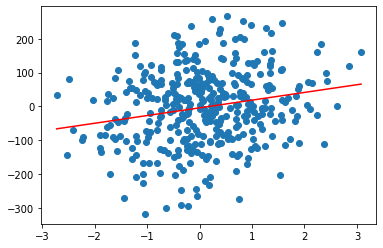

In [3]:
binary = LinearRegression()
binary.fit(x[[0]], y)
binary.predict(x[[0]])
plt.scatter(x[0], y)
xx = np.linspace(x[0].min(), x[0].max(), 100).reshape((-1, 1))
plt.plot(xx, binary.predict(xx), c='r')

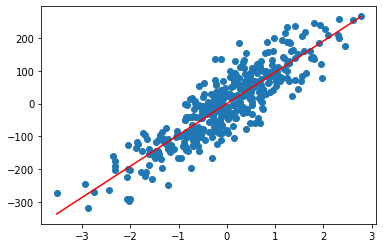

In [4]:
binary = LinearRegression()
binary.fit(x[[1]], y)
binary.predict(x[[1]])
plt.scatter(x[1], y)
xx = np.linspace(x[1].min(), x[1].max(), 100).reshape((-1, 1))
plt.plot(xx, binary.predict(xx), c='r')

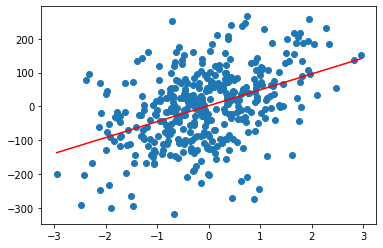

In [5]:
binary = LinearRegression()
binary.fit(x[[2]], y)
binary.predict(x[[2]])
plt.scatter(x[2], y)
xx = np.linspace(x[2].min(), x[2].max(), 100).reshape((-1, 1))
plt.plot(xx, binary.predict(xx), c='r')

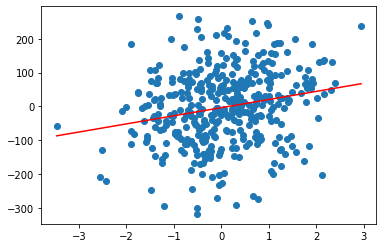

In [6]:
binary = LinearRegression()
binary.fit(x[[3]], y)
binary.predict(x[[3]])
plt.scatter(x[3], y)
xx = np.linspace(x[3].min(), x[3].max(), 100).reshape((-1, 1))
plt.plot(xx, binary.predict(xx), c='r')

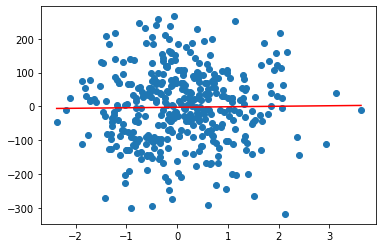

In [7]:
binary = LinearRegression()
binary.fit(x[[4]], y)
binary.predict(x[[4]])
plt.scatter(x[4], y)
xx = np.linspace(x[4].min(), x[4].max(), 100).reshape((-1, 1))
plt.plot(xx, binary.predict(xx), c='r')

In [11]:
#Самостоятельно постройте парные регрессии от каждого атрибута с целевой переменной.
degrees = [2, 3, 10]
results = []
for i in range(len(x.columns)):
    row = []
    for j in range(len(degrees)):
        poly = PolynomialFeatures(degrees[j])
        x_poly = poly.fit_transform(x.iloc[:, [i]])
        model = LinearRegression().fit(x_poly, y)
        y_pred = model.predict(x_poly)
        r2 = r2_score(y, y_pred)
        row.append(round(r2, 3))
    results.append(row)

results_df = pd.DataFrame(results, columns=['2nd degree', '3rd degree', '10th degree'], index=x.columns)
print(results_df)

   2nd degree  3rd degree  10th degree
0       0.044       0.044        0.050
1       0.770       0.771        0.773
2       0.190       0.193        0.204
3       0.048       0.050        0.073
4       0.001       0.001        0.045


In [12]:
#Постройте сводную таблицу показателей точности всех построенных моделей. Сделайте вывод, какие модели более точные.
r_squared_values = []

for i in range(x.shape[1]):
    x_i = x.iloc[:, [i]]
    model.fit(x_i, y)
    y_pred = model.predict(x_i)
    r_squared = r2_score(y, y_pred)
    r_squared_values.append(r_squared)

summary_table = pd.DataFrame({
    'Attribute': [f"Attribute {i+1}" for i in range(x.shape[1])],
    'R-squared': r_squared_values
})

print(summary_table)

     Attribute  R-squared
0  Attribute 1   0.043643
1  Attribute 2   0.769974
2  Attribute 3   0.187945
3  Attribute 4   0.047470
4  Attribute 5   0.000172


In [13]:
#Используйте другие метрики качества регрессионной модели в дополнение к коэффициенту детерминации.
model = LinearRegression()

model.fit(x, y)

y_pred = model.predict(x)

mse = metrics.mean_squared_error(y, y_pred)
r2 = metrics.r2_score(y, y_pred)
mae = metrics.mean_absolute_error(y, y_pred)
ev = metrics.explained_variance_score(y, y_pred)
max_err = metrics.max_error(y, y_pred)

print(f"Mean squared error (MSE): {mse:.2f}")
print(f"R-squared value (R^2): {r2:.2f}")
print(mae)
print(ev)
print(max_err)


Mean squared error (MSE): 93.49
R-squared value (R^2): 0.99
7.780683675008622
0.9922198026415868
38.00369305928465
